In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from scipy.spatial.distance import euclidean
from scipy.spatial import minkowski_distance

In [2]:
df = pd.read_pickle('../Data/cleaned_lyrics_lem')
df.reset_index(inplace=True, drop=True)

## TextBlob Euclidean

In [3]:
test = TextBlob(df.iloc[2].lyrics)
test

TextBlob("going back place born favorite hood believe found came used roam street skateboard cheap beer little punk found old used play sun went snack bottle wine much life defined friend guitarist know fun watching kid building tent outside got thinking good going back place born favorite hood believe found came used roam street skateboard cheap beer little punk tag still meat murder pavement used wonder went walk meant pavement band coincidence")

In [4]:
def sentimentitize(df):
    sentiment_df = pd.DataFrame(df.lyrics.apply(lambda x:
                                                TextBlob(x).sentiment))
    sentiment_df = pd.DataFrame(sentiment_df.lyrics.tolist())
    return sentiment_df

In [5]:
sentiment_df = sentimentitize(df)
sentiment_df.head()

,polarity,subjectivity
0,0.109280,0.458712
1,0.377273,0.531818
2,0.209615,0.434615
3,0.166667,0.413690
4,-0.024242,0.600000


In [6]:
def match_sentiment(sentiment_df, match_index):
    feats_to_match = sentiment_df.iloc[match_index].values
    distances_df = sentiment_df.apply(lambda x:
                                      euclidean(x.values, feats_to_match),
                                      axis=1)
    distances_df = pd.DataFrame(distances_df)
    distances_df.columns = ['distance']
    n_smallest = distances_df.nsmallest(4, 'distance').index
    return n_smallest

In [7]:
n_smallest = match_sentiment(sentiment_df, 1)

In [8]:
for i in n_smallest:
    print(df.iloc[i].lyrics, '\n')

bigger everything ever done x found reason staying home tonight self tonight gonna loop duplicate heart million song found reason going tonight making tonight computer putting guitar hold track come around really many interesting effect wanna try wanna try bigger everything ever done get sleep tonight feel good tonight damn feel sweet tonight neighbor complain cause got headphone get sleep tonight damn feel good tonight everything alright computer gonna save million song hope enjoy really many interesting effect wanna try wanna try understand repetetive chatter bigger everything ever done x 

verse lost voice river screamin courage take read mind called terror sleep keep world nearer refrain forget way pushed water inside wading spirit like flood floor forget forget forget forget forget forget forget forget pre miss keepin hope sleepin hope home hope home verse took face called choir knitting lace lash powdered ash held hand told wonder fit land wave held refrain forget way pushed wate

## vaderSentiment Euclidian

In [9]:
analyser = SentimentIntensityAnalyzer()

In [10]:
analyser.polarity_scores(df.iloc[1].lyrics)

{'neg': 0.072, 'neu': 0.691, 'pos': 0.237, 'compound': 0.9528}

In [11]:
def vader_sentimentify(df):
    scores = df.lyrics.apply(lambda x: analyser.polarity_scores(x))
    ps_df = pd.DataFrame(scores)
    ps_df = ps_df.lyrics.apply(pd.Series)
    return ps_df

In [12]:
scores_df = vader_sentimentify(df)

In [13]:
scores_df.head()

,neg,neu,pos,compound
0,0.041,0.735,0.224,0.9001
1,0.072,0.691,0.237,0.9528
2,0.054,0.740,0.206,0.9022
3,0.027,0.701,0.272,0.9709
4,0.256,0.433,0.310,-0.2500


In [14]:
def match_sentiment(sentiment_df, match_index):
    feats_to_match = sentiment_df.iloc[match_index].values
    distances_df = sentiment_df.apply(lambda x:
                                      euclidean(x.values, feats_to_match),
                                      axis=1)
    distances_df = pd.DataFrame(distances_df)
    distances_df.columns = ['distance']
    n_smallest = distances_df.nsmallest(4, 'distance').index
    return n_smallest

In [15]:
n_smallest = match_sentiment(scores_df, 1)

In [16]:
for i in n_smallest:
    print(df.iloc[i].lyrics, '\n')

bigger everything ever done x found reason staying home tonight self tonight gonna loop duplicate heart million song found reason going tonight making tonight computer putting guitar hold track come around really many interesting effect wanna try wanna try bigger everything ever done get sleep tonight feel good tonight damn feel sweet tonight neighbor complain cause got headphone get sleep tonight damn feel good tonight everything alright computer gonna save million song hope enjoy really many interesting effect wanna try wanna try understand repetetive chatter bigger everything ever done x 

verse want say see sit alone looking sit alone throne back want stroll leg want hold arm hear sound heart beat noise move turn stone pull sword bone love call door love sound noise noise noise bridge heard voice tune thought gone steeplechasing moon heard say hear like way fix hair verse want say see sit alone looking sit alone throne back want stroll leg want hold arm hear sound heart beat loud n

In [17]:
vader_df = df.merge(scores_df, left_index=True, right_index=True)

In [18]:
vader_df.to_pickle('../Data/vader_sentiment_scores_df')

## Combining Results - Euclidean Distance

In [19]:
combined_sentiment = pd.merge(scores_df, sentiment_df,
                              left_index=True, right_index=True)

We can see the the two different sentiment analyzers I've used do not correlate strongly with each other.  
Bearing that in mind I have decided to use both as I believe they are both capturing signal the the others were unable to capture.

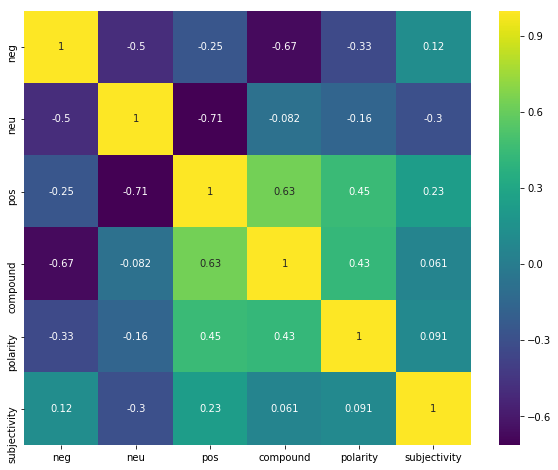

In [20]:
plt.figure(figsize=(10, 8))
corr_df = combined_sentiment.corr()
sns.heatmap(corr_df, annot=True, cmap='viridis');

In [21]:
def match_sentiment(sentiment_df, match_index):
    feats_to_match = sentiment_df.iloc[match_index].values
    distances_df = sentiment_df.apply(lambda x:
                                      euclidean(x.values, feats_to_match),
                                      axis=1)

    distances_df = pd.DataFrame(distances_df)
    distances_df.columns = ['distance']
    n_smallest = distances_df.nsmallest(4, 'distance').index
    return n_smallest

In [22]:
n_smallest = match_sentiment(combined_sentiment, 1)

In [23]:
for i in n_smallest:
    print(df.iloc[i].lyrics, '\n')

bigger everything ever done x found reason staying home tonight self tonight gonna loop duplicate heart million song found reason going tonight making tonight computer putting guitar hold track come around really many interesting effect wanna try wanna try bigger everything ever done get sleep tonight feel good tonight damn feel sweet tonight neighbor complain cause got headphone get sleep tonight damn feel good tonight everything alright computer gonna save million song hope enjoy really many interesting effect wanna try wanna try understand repetetive chatter bigger everything ever done x 

party girl get hurt feel anything learn push push one good time call phone blowin ringin doorbell feel love feel love one two three one two three drink one two three one two three drink one two three one two three drink throw em back till lose count gonna swing chandelier chandelier gonna live like tomorrow exist like exist gonna fly like bird night feel tear dry gonna swing chandelier chandelier 

In [24]:
combined_sentiment_df = df.merge(combined_sentiment,
                                 left_index=True, right_index=True)

In [25]:
combined_sentiment_df.to_pickle('../Data/combined_sentiment_scores_df')

In [26]:
combined_sentiment_df.head()

,spotify_album_uri,spotify_artist_id,artist_name,spotify_artist_uri,duration_ms,explicit,spotify_song_id,song_title,song_spotify_page,track_number,...,lyrics,genius_song_id,genius_song_url,genius_artist_id,neg,neu,pos,compound,polarity,subjectivity
0,spotify:album:2h6MSR1rWemHOtmurgRq3T,7kAKqNxPBkfjgdHzUIdBtI,suburban kids with biblical names,spotify:artist:7kAKqNxPBkfjgdHzUIdBtI,138626,False,4okEZakOVppAtP4Dawd52x,marry me,https://open.spotify.com/track/4okEZakOVppAtP4...,1,...,old chance get gonna marry marry get act toget...,861607,https://genius.com/Suburban-kids-with-biblical...,353411,0.041,0.735,0.224,0.9001,0.109280,0.458712
1,spotify:album:2h6MSR1rWemHOtmurgRq3T,7kAKqNxPBkfjgdHzUIdBtI,suburban kids with biblical names,spotify:artist:7kAKqNxPBkfjgdHzUIdBtI,187106,False,2LV6sB5zTsu0R5r5kWohlD,loop duplicate my heart,https://open.spotify.com/track/2LV6sB5zTsu0R5r...,2,...,bigger everything ever done x found reason sta...,980120,https://genius.com/Suburban-kids-with-biblical...,353411,0.072,0.691,0.237,0.9528,0.377273,0.531818
2,spotify:album:2h6MSR1rWemHOtmurgRq3T,7kAKqNxPBkfjgdHzUIdBtI,suburban kids with biblical names,spotify:artist:7kAKqNxPBkfjgdHzUIdBtI,176026,False,53uzYuKe433aXBjzBiuvqe,parakit,https://open.spotify.com/track/53uzYuKe433aXBj...,4,...,going back place born favorite hood believe fo...,1583231,https://genius.com/Suburban-kids-with-biblical...,353411,0.054,0.740,0.206,0.9022,0.209615,0.434615
3,spotify:album:2h6MSR1rWemHOtmurgRq3T,7kAKqNxPBkfjgdHzUIdBtI,suburban kids with biblical names,spotify:artist:7kAKqNxPBkfjgdHzUIdBtI,198013,False,7p0pJgizlHS5msrgDPU6li,trees and squirrels,https://open.spotify.com/track/7p0pJgizlHS5msr...,5,...,tree wild undisputably beautiful today see squ...,1340623,https://genius.com/Suburban-kids-with-biblical...,353411,0.027,0.701,0.272,0.9709,0.166667,0.413690
4,spotify:album:2h6MSR1rWemHOtmurgRq3T,7kAKqNxPBkfjgdHzUIdBtI,suburban kids with biblical names,spotify:artist:7kAKqNxPBkfjgdHzUIdBtI,178040,False,1drw02VGWNxVtZuF2Qjp8e,funeral face,https://open.spotify.com/track/1drw02VGWNxVtZu...,6,...,said love said like want see sun go wrote told...,1042112,https://genius.com/Suburban-kids-with-biblical...,353411,0.256,0.433,0.310,-0.2500,-0.024242,0.600000


## Combined Results - Minkowsky Distance

In [27]:
def match_sentiment(sentiment_df, match_index):
    feats_to_match = sentiment_df.iloc[match_index].values
    distances_df = sentiment_df.apply(lambda x:
                                      minkowski_distance(x.values,
                                                         feats_to_match,
                                                         p=1),
                                      axis=1)
    distances_df = pd.DataFrame(distances_df)
    distances_df.columns = ['distance']
    n_smallest = distances_df.nsmallest(4, 'distance').index
    return n_smallest

In [28]:
n_smallest = match_sentiment(combined_sentiment, 100)

In [29]:
for i in n_smallest:
    print(df.iloc[i].lyrics, '\n')

sunny day chariot waving back post losing touch much running back said angel wing time spent nobody know close come rite sand heart hand woman chaser wife abide build plane take land divide sunny day chariot waving back verse way chased cadillac back coastline sun back woman chaser scarlet land would taken love back sunny day chariot waving back post one last call one last call 

verse r b bbc blue eyed star dream across sea meet massively look english gal singing american soul looking english gal singing american soul came northern street bleached teeth voted best south shorthand soul playin white rock n roll would box dream land free look english boy singing american soul look english boy picking american outro want sing american farther want sing american english girl want sing american american soul want sing american english boy want sing american american soul want sing american english girl american soul 

verse samantha gongol looking little something ignoring looking know exac

In [30]:
for i in n_smallest:
    print(df.iloc[i].spotify_song_uri,'\n')

spotify:track:6dB3Uad2TOaJcGKpM3zizO 

spotify:track:0g9cWLclQgi2M5H4TwqLXO 

spotify:track:3NpsflsHTAoand4Jl3ruP7 

spotify:track:5CmQgmKwmSf3ojZTuvHekY 

